

<h1><center><strong>Feature Selection</strong></center></h1>

# **Table of Contents**

1. [Introduction](#Section1)<br><br>
2. [Univariate Selection](#Section2)<br><br>
3. [Recursive Feature Elimination (RFE)](#Section3)<br><br>
4. [Principal Component Analysis (PCA)](#Section4)<br><br>
5. [Choosing Important Features (Feature Importance)](#Section5)

<a id = Section1></a>
### **1. Introduction**

- **Not all features** are created **equal**. 
  
  - Those attributes that are **irrelevant** to the problem need to be **removed**.
  
  - There will be some **features** that will be **more important** than others to the model accuracy.

  - There will also be features that will be **redundant** in the context of other features.

  - Feature selection **addresses** all these problem.

<br> 

- **Feature selection** is a process where you **automatically select** those **features** in your data that contribute **most** to the **prediction** variable or output in which you are interested.

- Having **irrelevant features** in your data can **decrease** the **accuracy** of many models, especially linear algorithms like linear and logistic regression.

<br> 

- **Advantages** of Feature Selection:

  - **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.

  - **Improves Accuracy**: Less misleading data means modeling accuracy improves.

  - **Reduces Training Time**: Fewer data points reduce algorithm complexity and algorithms train faster.

<br> 

- **Types** of Feature Selection Algorithms:

  - **Univariate Selection**

  - **Recursive Feature Elimination** (**RFE**)

  - **Principal Component Analysis** (**PCA**)

  - **Choosing Important Features** (**Feature Importance**)

In [ ]:
import numpy as np
import pandas as pd

**Loading the Dataset**

- We will be using the **Diabetes** dataset.

- The Diabetes dataset involves **predicting** the **onset of diabetes** within 5 years in given medical details.

In [ ]:
# Load data
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/pima-indians-diabetes.csv', names=names)
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There are **768** samples in the data, and **9** variables.

<a id = Section2></a>
### **2. Univariate Selection**

- **Statistical tests** can be used to **select** those **features** that have the **strongest relationships** with the **output** variable.

- The scikit-learn library provides the `SelectKBest` class, which can be **used** with a suite of different **statistical tests** to **select** a specific number of **features**.

- For example the **ANOVA F-value method** is appropriate for **numerical inputs** and **categorical** data.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

- **Creating** an **array** of dataset values.

In [ ]:
array = dataframe.values

- **Splitting** the data into a **feature matrix**, **X** and **target variable**, **Y**.

In [ ]:
X = array[:, 0:8]
Y = array[:, 8]

- Using `SelectKBest` to select the **4** best features.

- We will be applying the **ANOVA F-value method** via the `f_classif()` function.

In [ ]:
# Feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

In [ ]:
# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

[ 39.67  213.162   3.257   4.304  13.281  71.772  23.871  46.141]


In [ ]:
# Creating a list of feature names
feature_names = dataframe.iloc[:, 0:8].columns

In [ ]:
# Checking the scores of various features.
# Sorting the scores by descending order (lowest scores at the bottom).

for score, name in sorted(zip(fit.scores_, feature_names), reverse=True):
    print('Feature Score of', name, ':', score)

Feature Score of plas : 213.16175217803828
Feature Score of mass : 71.7720721022405
Feature Score of age : 46.140611238735865
Feature Score of preg : 39.670227393616116
Feature Score of pedi : 23.871300204344593
Feature Score of test : 13.281107531096337
Feature Score of skin : 4.304380905008516
Feature Score of pres : 3.256950397889028


- We can see the **scores** for **each attribute** and the **4** attributes chosen (those with the **highest scores**).

- Specifically features with indexes **0** (**preq**), **1** (**plas**), **5** (**mass**), and **7** (**age**).

- We will create an **array** consisting of only the **4 most important features**.

In [ ]:
features = fit.transform(X)

In [ ]:
# Summarize selected features
print(features[0:5, :])

[[  6.  148.   33.6  50. ]
 [  1.   85.   26.6  31. ]
 [  8.  183.   23.3  32. ]
 [  1.   89.   28.1  21. ]
 [  0.  137.   43.1  33. ]]


- The **features** array consists of only the **4** best features, and can be used to train a model.

<a id = Section3></a>
### **3. Recursive Feature Elimination (RFE)**

- The **Recursive Feature Elimination** (or **RFE**) works by **recursively removing attributes** and building a model on those attributes that remain.

- It uses the **model accuracy** to **identify** which attributes (and combination of attributes) **contribute** the **most** to predicting the target attribute.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
array = dataframe.values

In [ ]:
X = array[:, 0:8]
Y = array[:, 8]

- We will use **RFE** with the **logistic regression** algorithm to select the top **3** features.

- The choice of algorithm does not matter too much as long as it is skillful and consistent.

In [ ]:
# Feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)

In [ ]:
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


In [ ]:
# Creating a list of feature names
feature_names = dataframe.iloc[:, 0:8].columns

In [ ]:
# Printing the score and rank of each feature
for rank, support, name in sorted(zip(fit.ranking_, fit.support_, feature_names)):
    print('Support and Rank of', name, ':', support, '(', rank, ')')

Support and Rank of mass : True ( 1 )
Support and Rank of pedi : True ( 1 )
Support and Rank of preg : True ( 1 )
Support and Rank of plas : False ( 2 )
Support and Rank of pres : False ( 3 )
Support and Rank of age : False ( 4 )
Support and Rank of skin : False ( 5 )
Support and Rank of test : False ( 6 )


- We can see that RFE chose the the top **3** features as `preg`, `mass` and `pedi`.

- These are marked **True** in the `support_` array and marked with a choice **“1”** in the `ranking_` array.

- These features can be **selected** to be used for training the model.

<a id = Section4></a>
### **4. Principal Component Analysis (PCA)**

- **Principal Component Analysis** (or **PCA**) uses **linear algebra** to **transform** the dataset into a **compressed** form.

- Generally this is called a **data reduction** technique.

- A property of PCA is that you can **choose** the **number** of **dimensions** or **principal components** in the transformed result.

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
array = dataframe.values

In [ ]:
X = array[:, 0:8]
Y = array[:, 8]

- We will use **PCA** and select **3 principal components**.

In [ ]:
# Feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)

In [ ]:
print(fit.components_)

[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


In [ ]:
# Summarize components
print('Explained Variance: %s' % fit.explained_variance_ratio_)
print('Total Explained Variance: %s' % fit.explained_variance_ratio_.sum())

Explained Variance: [0.889 0.062 0.026]
Total Explained Variance: 0.9759275372391618


- You can see that the **transformed** dataset (3 principal components) bare **little resemblance** to the source data.

- Our **3** principal components explain **97.59% variance** in the data.

- This new dataset can be used to train the model.

<a id = Section5></a>
### **5. Choosing Important Features (Feature Importance)**

- We can objectively estimate the **importance** of features using **Bagged Decision Trees** like **Random Forest** and **Extra Trees**. 

- This can be helpful as a **precursor** to **selecting features**.

  - Features are allocated **scores** and can then be **ranked** by their scores.

- Those features with the **highest scores** can be **selected** for inclusion in the training dataset, whereas those **remaining** can be **ignored**.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
array = dataframe.values

In [ ]:
X = array[:, 0:8]
Y = array[:, 8]

- **Fitting** the data on an `ExtraTreesClassifier` with **10** trees.

In [ ]:
# Feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
# Creating a list of feature names
feature_names = dataframe.iloc[:, 0:8].columns

In [ ]:
# Checking the feature importances of various features.
# Sorting the importances by descending order (lowest importance at the bottom).

for score, name in sorted(zip(model.feature_importances_, feature_names), reverse=True):
    print('Feature importance of', name, ':', score*100, '%')

Feature importance of plas : 22.86230790772045 %
Feature importance of age : 14.716999021243696 %
Feature importance of mass : 13.801120650801902 %
Feature importance of pedi : 11.603213187174008 %
Feature importance of pres : 10.809186873317703 %
Feature importance of preg : 10.434066130914166 %
Feature importance of skin : 8.616801141649653 %
Feature importance of test : 7.156305087178426 %


- The `plas` column has the **highest** feature importance with **22.86%**, followed by `age` and `mass`.

- The `test` column has the **least** importance.

- We can **plot** the feature **importances** for a better visualization.

Text(0.5, 1.0, 'Feature Importance of each Feature')

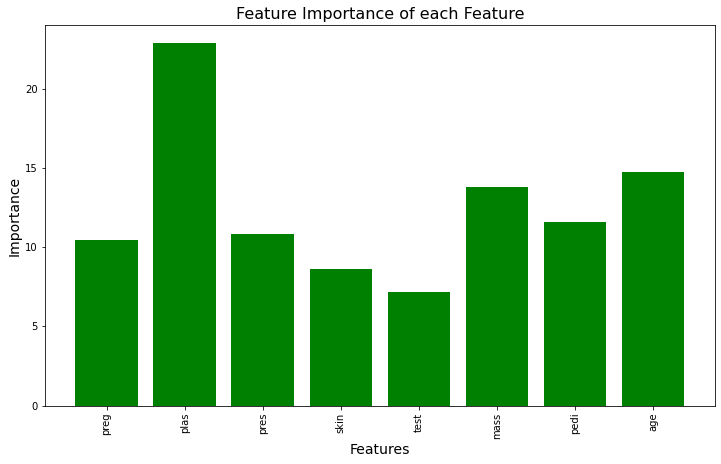

In [ ]:
# Plotting the Feature Importance of each feature.
plt.figure(figsize=(12, 7))
plt.bar(feature_names, model.feature_importances_*100, color='green')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=90)
plt.title('Feature Importance of each Feature', fontsize=16)

- We can **drop** the **least important** features by **iteratively training** a model on **1 less feature**, and **evaluating** the model performance.